In [30]:
import keras
from keras.datasets import imdb

In [31]:
(Xtrain,ytrain), (Xtest,ytest) = imdb.load_data(num_words=10000)

In [32]:
import numpy as np
def multi_hot_encode(sequences, num_classes):
    results = np.zeros((len(sequences),num_classes))
    for i,sequence in enumerate(sequences):
        results[i][sequence] = 1.0
    return results

In [33]:
Xtrain_encoded = multi_hot_encode(Xtrain,10000)
Xtest_encoded = multi_hot_encode(Xtest,10000)

In [34]:
ytrain_encoded = ytrain.astype('float32')
ytest_encoded = ytest.astype('float32')

In [35]:
from keras import layers

model = keras.Sequential([
    layers.Dense(16,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid'),
])

In [36]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

In [37]:
history = model.fit(Xtrain_encoded,ytrain_encoded,epochs=20,batch_size=512,validation_split=0.2)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8008 - loss: 0.5072 - val_accuracy: 0.8780 - val_loss: 0.3450
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9087 - loss: 0.2678 - val_accuracy: 0.8902 - val_loss: 0.2833
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9337 - loss: 0.1939 - val_accuracy: 0.8930 - val_loss: 0.2720
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9495 - loss: 0.1518 - val_accuracy: 0.8886 - val_loss: 0.2923
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9595 - loss: 0.1217 - val_accuracy: 0.8860 - val_loss: 0.3040
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9692 - loss: 0.0983 - val_accuracy: 0.8844 - val_loss: 0.3317
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9776 - loss: 0.0799 - val_accuracy: 0.8832 - val_loss: 0.3680
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9818 - loss: 0.0661 - val_accuracy: 0.8764 - val_loss:

In [38]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

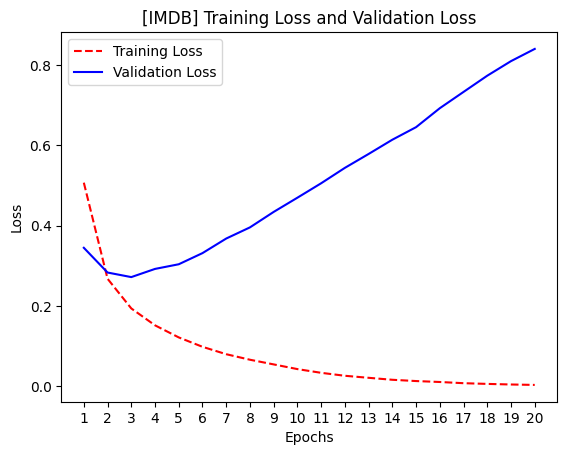

In [39]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'r--',label='Training Loss')
plt.plot(epochs,val_loss_values,'b',label = 'Validation Loss')
plt.xticks(epochs)
plt.title('[IMDB] Training Loss and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()